As a starter of this continuation notebook, let's load the model we have just trained in the last notebook

In [1]:
# Load the saved model
from joblib import load
knn = load(filename='./saved-model/mushrooms-classification-gs-knn.joblib')
logreg = load(filename='./saved-model/mushrooms-classification-gs-logreg.joblib')
rf = load(filename='./saved-model/mushrooms-classification-gs-rf.joblib')

In [2]:
knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             verbose=True)

In [3]:
logreg

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 500, 1000],
                         'solver': ['liblinear']},
             verbose=True)

In [4]:
rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

## Preparing the test data

We need the same data treatment as last time. What we need to do:
1. Load the same dataset
2. Split the data and focus on X_test
3. Preprocess the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('./datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now we split the data into train and test with the same random seed

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

# Create X and y
X = df.drop('class', axis=1)
y = df['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(6499, 1625, 6499, 1625)

We're only going to need the X_test

In [8]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,f,f,n,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
6654,f,s,e,f,y,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
5606,x,y,n,f,f,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,l
3332,f,y,g,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,n,y,d
6988,f,s,e,f,s,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l


In [9]:
len(X_test)

1625

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1971 to 3341
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 1625 non-null   object
 1   cap-surface               1625 non-null   object
 2   cap-color                 1625 non-null   object
 3   bruises                   1625 non-null   object
 4   odor                      1625 non-null   object
 5   gill-attachment           1625 non-null   object
 6   gill-spacing              1625 non-null   object
 7   gill-size                 1625 non-null   object
 8   gill-color                1625 non-null   object
 9   stalk-shape               1625 non-null   object
 10  stalk-root                1625 non-null   object
 11  stalk-surface-above-ring  1625 non-null   object
 12  stalk-surface-below-ring  1625 non-null   object
 13  stalk-color-above-ring    1625 non-null   object
 14  stalk-color-below-rin

In [11]:
# Make a copy of our test data
df_X_test = X_test.copy()
df_y_test = y_test.copy()

In [12]:
for label, content in df_X_test.items():
    if pd.api.types.is_string_dtype(content):
        df_X_test[label] = content.astype('category').cat.as_ordered()
        df_X_test[label] = pd.Categorical(content).codes

In [13]:
df_X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,2,0,4,0,5,1,1,0,3,1,...,0,7,7,0,2,1,0,3,3,1
6654,2,2,2,0,8,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,2
5606,5,3,4,0,2,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,2
3332,2,3,3,1,5,1,0,0,5,1,...,2,3,6,0,2,1,4,3,5,0
6988,2,2,2,0,7,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,2


In [14]:
df_y_test.head()

1971    e
6654    p
5606    p
3332    e
6988    p
Name: class, dtype: object

In [15]:
df_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1971 to 3341
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 1625 non-null   int8 
 1   cap-surface               1625 non-null   int8 
 2   cap-color                 1625 non-null   int8 
 3   bruises                   1625 non-null   int8 
 4   odor                      1625 non-null   int8 
 5   gill-attachment           1625 non-null   int8 
 6   gill-spacing              1625 non-null   int8 
 7   gill-size                 1625 non-null   int8 
 8   gill-color                1625 non-null   int8 
 9   stalk-shape               1625 non-null   int8 
 10  stalk-root                1625 non-null   int8 
 11  stalk-surface-above-ring  1625 non-null   int8 
 12  stalk-surface-below-ring  1625 non-null   int8 
 13  stalk-color-above-ring    1625 non-null   int8 
 14  stalk-color-below-ring    1625 non-nu

In [16]:
df_y_test.replace({'e': 0, 'p': 1}, inplace=True)

In [17]:
df_y_test

1971    0
6654    1
5606    1
3332    0
6988    1
       ..
7374    1
1149    0
4999    1
7497    1
3341    1
Name: class, Length: 1625, dtype: int64

Don't forget to drop the **veil-type** column like we did in training process

In [18]:
df_X_test['veil-type']

1971    0
6654    0
5606    0
3332    0
6988    0
       ..
7374    0
1149    0
4999    0
7497    0
3341    0
Name: veil-type, Length: 1625, dtype: int8

In [19]:
df_X_test.drop('veil-type', axis=1, inplace=True)

In [20]:
df_X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,2,0,4,0,5,1,1,0,3,1,...,2,0,7,7,2,1,0,3,3,1
6654,2,2,2,0,8,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,2
5606,5,3,4,0,2,1,0,1,0,1,...,1,2,7,6,2,1,0,7,4,2
3332,2,3,3,1,5,1,0,0,5,1,...,2,2,3,6,2,1,4,3,5,0
6988,2,2,2,0,7,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,2


## Evaluations
1. ROC Curve and AUC scores
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

In [21]:
models = {'knn': knn,
          'logreg': logreg,
          'rf': rf}

model_scores = {}
for name, model in models.items():
        model_scores[name] = model.score(df_X_test, df_y_test)

In [22]:
model_scores

{'knn': 1.0, 'logreg': 0.9661538461538461, 'rf': 1.0}

**ROC Curve and AUC Scores**

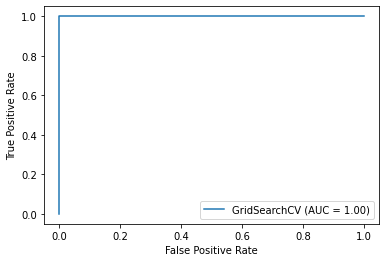

In [26]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, df_X_test, df_y_test)

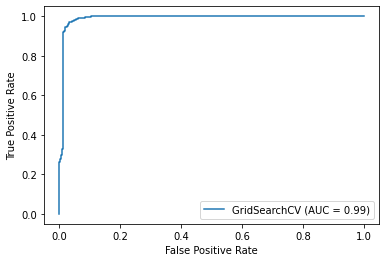

In [27]:
plot_roc_curve(logreg, df_X_test, df_y_test)

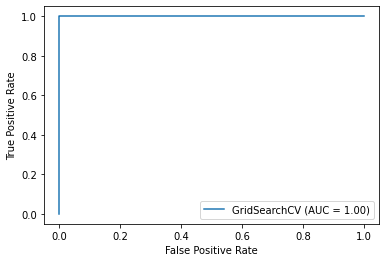

In [28]:
plot_roc_curve(rf, df_X_test, df_y_test)

**Confusion matrix**

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_conf_mat(test, preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(test, preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

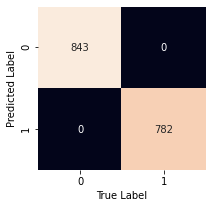

In [43]:
plot_conf_mat(df_y_test, knn.predict(df_X_test))

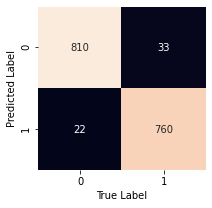

In [45]:
plot_conf_mat(df_y_test, logreg.predict(df_X_test))

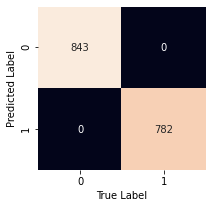

In [44]:
plot_conf_mat(df_y_test, rf.predict(df_X_test))

**Classification report**

In [48]:
print(classification_report(df_y_test, knn.predict(df_X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [49]:
print(classification_report(df_y_test, logreg.predict(df_X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       843
           1       0.96      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [50]:
print(classification_report(df_y_test, rf.predict(df_X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

